    Year  Gas (TWh, direct energy)  Oil (TWh, direct energy)  \
0   1800                     0.000                     0.000   
1   1810                     0.000                     0.000   
2   1820                     0.000                     0.000   
3   1830                     0.000                     0.000   
4   1840                     0.000                     0.000   
..   ...                       ...                       ...   
71  2019                 39084.453                 53618.926   
72  2020                 38714.090                 48745.684   
73  2021                 40239.016                 51530.492   
74  2022                 40086.875                 53226.840   
75  2023                 40101.740                 54564.000   

    Coal (TWh, direct energy)  consumo totale  
0                      97.000          97.000  
1                     128.000         128.000  
2                     153.000         153.000  
3                     264.000         2

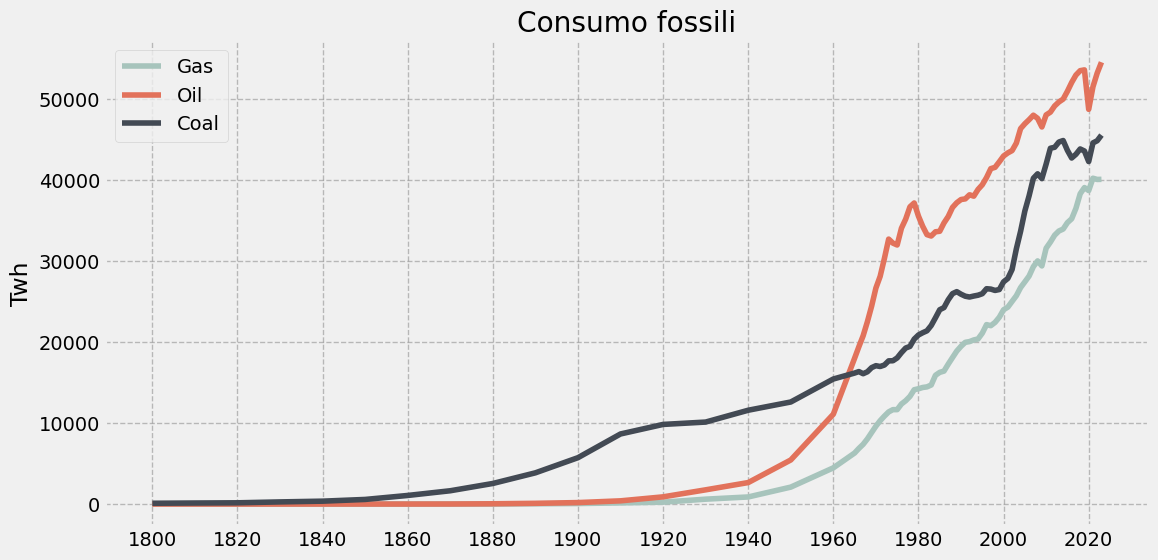

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

dati = pd.read_csv('..\csv\\fonti-fossili\global-fossil-fuel-consumption\global-fossil-fuel-consumption.csv',usecols = [2,3,4,5])
#print(dati)
df = pd.DataFrame(dati)
df['consumo totale'] = df['Gas (TWh, direct energy)'] + df['Oil (TWh, direct energy)'] + df['Coal (TWh, direct energy)']
print(df)

# Dati da visualizzare
x = df["Year"]
y = df["consumo totale"]
y1= df['Gas (TWh, direct energy)']
y2= df['Oil (TWh, direct energy)']
y3= df['Coal (TWh, direct energy)']

# **Aggiungi questa linea per cambiare le dimensioni del grafico**
plt.figure(figsize=(12, 6))  # Larghezza 12 pollici, Altezza 6 pollici. Regola questi valori a piacere.

plt.grid(True, which='both', axis='both', linestyle='--', color='gray', alpha=0.5)
plt.xticks(np.arange(1800, 2023, 20))

# Creazione del grafico
#plt.plot(x, y, label='Linea 0', color='black')  # Prima linea
plt.plot(x, y1, label='Gas', color='#A7C4BC')  # Prima linea
plt.plot(x, y2, label='Oil', color='#E2725B')  # Seconda linea
plt.plot(x, y3, label='Coal', color='#434A54')  # Terza linea
# Aggiungi un titolo
plt.title('Consumo fossili')

# Etichette per gli assi
plt.ylabel('Twh')

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()

    Year  Gas (TWh, direct energy)  Oil (TWh, direct energy)  \
16  1960                 4472.0000                 11097.000   
17  1965                 6303.8203                 18012.520   
18  1966                 6868.8140                 19427.398   
19  1967                 7374.0580                 20779.828   
20  1968                 8044.3477                 22511.285   
21  1969                 8833.4340                 24446.174   
22  1970                 9614.8090                 26672.713   
23  1971                10293.1900                 28117.908   
24  1972                10861.7130                 30331.375   
25  1973                11377.8320                 32722.135   
26  1974                11659.8590                 32224.648   
27  1975                11659.7360                 31992.346   
28  1976                12354.1390                 34059.953   
29  1977                12759.8380                 35189.734   
30  1978                13293.9470      

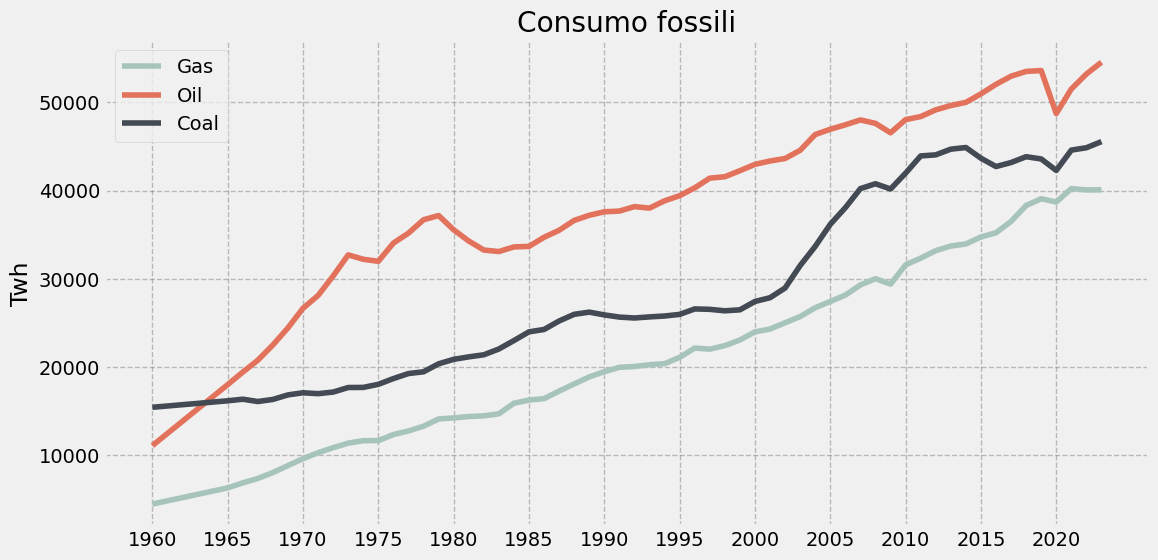

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

dati = pd.read_csv('..\csv\\fonti-fossili\global-fossil-fuel-consumption\global-fossil-fuel-consumption.csv',usecols = [2,3,4,5])
#print(dati)
df = pd.DataFrame(dati)
df['consumo totale'] = df['Gas (TWh, direct energy)'] + df['Oil (TWh, direct energy)'] + df['Coal (TWh, direct energy)']

df=df[(df['Year'] > 1950) ]
print(df)

# Dati da visualizzare
x = df["Year"]
y = df["consumo totale"]
y1= df['Gas (TWh, direct energy)']
y2= df['Oil (TWh, direct energy)']
y3= df['Coal (TWh, direct energy)']
# **Aggiungi questa linea per cambiare le dimensioni del grafico**
plt.figure(figsize=(12, 6))  # Larghezza 12 pollici, Altezza 6 pollici. Regola questi valori a piacere.

plt.grid(True, which='both', axis='both', linestyle='--', color='gray', alpha=0.5)
plt.xticks(np.arange(1960, 2025, 5)) 

# Creazione del grafico
#plt.plot(x, y, label='Linea 0', color='black')  # Prima linea
plt.plot(x, y1, label='Gas', color='#A7C4BC')  # Prima linea
plt.plot(x, y2, label='Oil', color='#E2725B')  # Seconda linea
plt.plot(x, y3, label='Coal', color='#434A54')  # Terza linea
# Aggiungi un titolo
plt.title('Consumo fossili')

# Etichette per gli assi
plt.ylabel('Twh')

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()




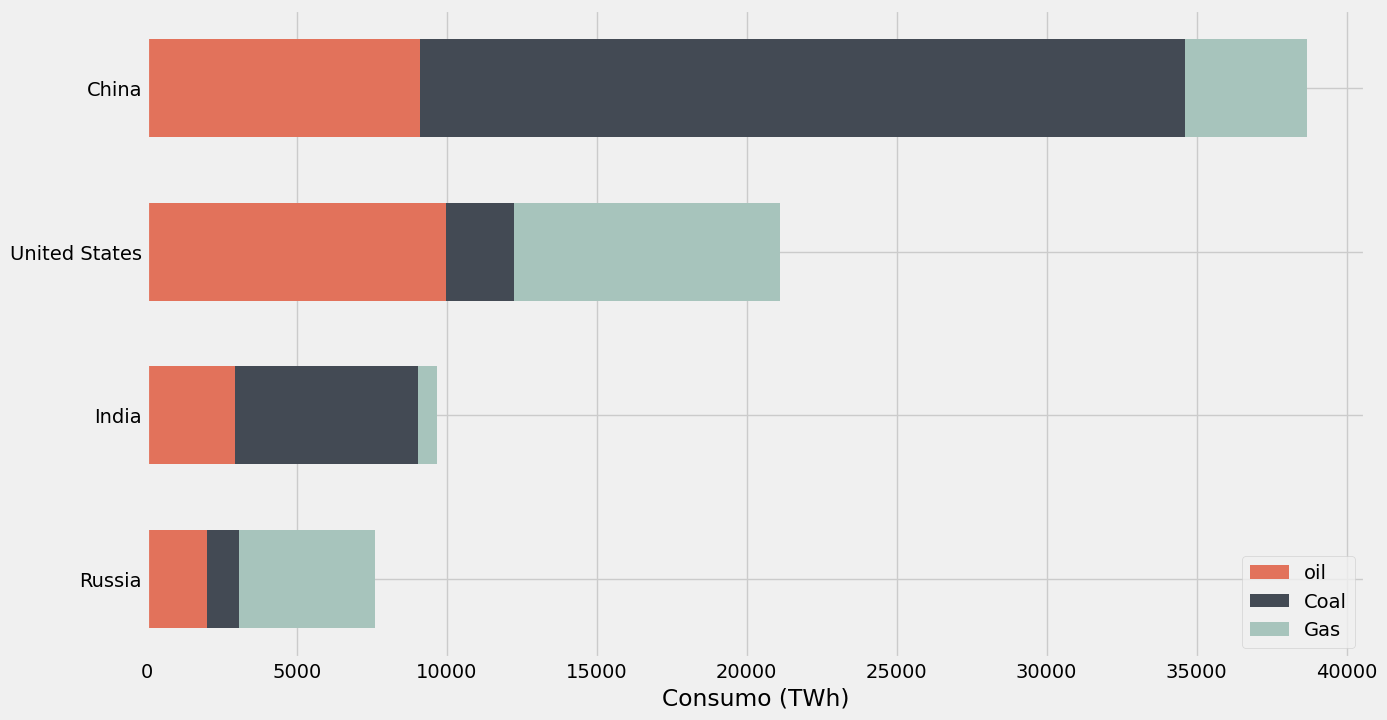

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')  # Stile elegante

# Caricamento dei dati
dati = pd.read_csv('..\csv\consumi-e-produzioni\energy-consumption-by-source-and-country\energy-consumption-by-source-and-country.csv')
df = pd.DataFrame(dati)

# Filtraggio dei dati per l'anno 2023 e i paesi scelti
anno = 2023
paesi = ["United States", "Europe (Ember)", "China", "India","Russia"]
df_filtered = df[df["Entity"].isin(paesi) & (df["Year"] == anno)].copy() # Usiamo .copy() per evitare Warning

# Calcola il consumo totale di rinnovabili per ordinare
df_filtered['Total Fossil'] = df_filtered[['Gas consumption - TWh', 'Coal consumption - TWh', 'Oil consumption - TWh']].sum(axis=1)

# Ordina il DataFrame per 'Total Renewables' in ordine decrescente
df_sorted = df_filtered.sort_values(by='Total Fossil', ascending=False)

# Impostazione del grafico
y = np.arange(len(df_sorted)) # Usa df_sorted
fig, ax = plt.subplots(figsize=(14, 8))

bar_height = 0.6  # Spessore delle barre

# Creazione delle barre impilate - Usa df_sorted
bar1 = ax.barh(y, df_sorted["Oil consumption - TWh"], color='#E2725B', label="oil", height=bar_height)
bar2 = ax.barh(y, df_sorted["Coal consumption - TWh"], left=df_sorted["Oil consumption - TWh"], color='#434A54', label="Coal", height=bar_height)
bar3 = ax.barh(y, df_sorted["Gas consumption - TWh"], left=df_sorted["Coal consumption - TWh"] + df_sorted["Oil consumption - TWh"], color='#A7C4BC', label="Gas", height=bar_height)

# Aggiunta delle etichette (una sotto l'altra) - Commentato fuori per chiarezza, puoi riattivare se necessario
# for i in range(len(df_sorted)):
#     x_pos = df_sorted.iloc[i, 2:6].sum()-2000  # Calcola la fine della barra
#     labels = [
#         f"{df_sorted.iloc[i]['Electricity from hydro - TWh']:.0f} TWh",
#         f"{df_sorted.iloc[i]['Electricity from wind - TWh']:.0f} TWh",
#         f"{df_sorted.iloc[i]['Electricity from solar - TWh']:.0f} TWh",
#         f"{df_sorted.iloc[i]['Other renewables including bioenergy - TWh']:.0f} TWh"
#     ]

#     # Posizionamento delle etichette una sotto l'altra, appena dopo la barra
#     for j, (value, color) in enumerate(zip(labels, ['blue', 'skyblue', 'orange', 'green'])):
#         ax.text(x_pos, y[i] - 0.2 + j * 0.2, value, va='bottom', fontsize=10,
#                 bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))

# Titoli e legende
ax.set_xlabel("Consumo (TWh)")
#ax.set_title("Produzione di energia da fonti rinnovabili tra vari paesi nel 2023 (Ordinato per Totale Rinnovabili)") # Titolo aggiornato
ax.set_yticks(y)
ax.set_yticklabels(df_sorted["Entity"]) # Usa df_sorted per le etichette
ax.legend()

plt.gca().invert_yaxis() # Inverti l'asse Y per avere il valore più grande in alto

plt.show()

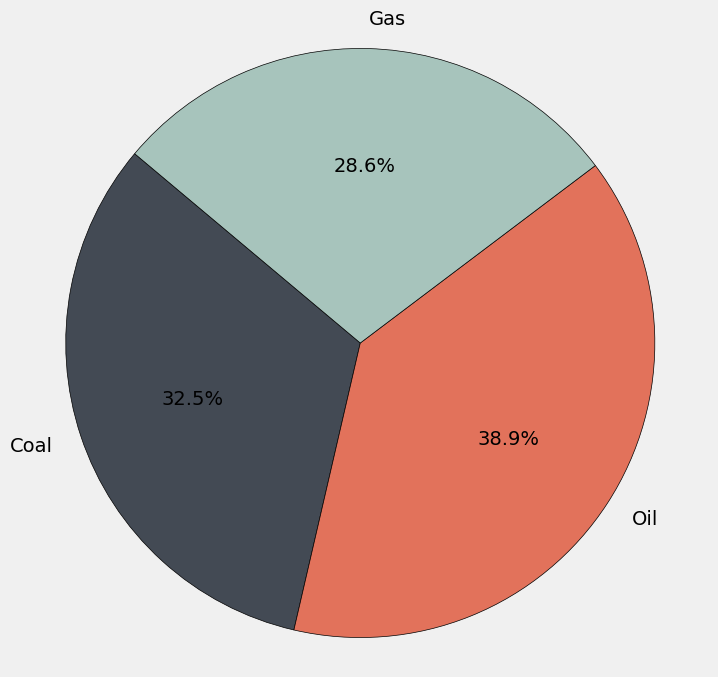

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')  # Stile elegante

# Caricamento dei dati
dati = pd.read_csv('..\csv\\fonti-fossili\global-fossil-fuel-consumption\global-fossil-fuel-consumption.csv',usecols = [2,3,4,5])
df = pd.DataFrame(dati)

# Parametri modificabili per paese e anno
paese = "World"
anno = 2023

# Filtro per il paese e l'anno
df = df[(df["Year"] == anno)]

# Verifica che ci siano dati per il paese e l'anno specificati
if df.empty:
    print(f"Non ci sono dati disponibili per {paese} nel {anno}.")
else:
    # Calcolo del totale delle energie rinnovabili
    totale = df[[
        "Coal (TWh, direct energy)",
        "Oil (TWh, direct energy)",
        "Gas (TWh, direct energy)"
    ]].sum(axis=1).values[0]

    # Creazione della lista delle percentuali
    percentuale = [
        df["Coal (TWh, direct energy)"].values[0] / totale * 100,
        df["Oil (TWh, direct energy)"].values[0] / totale * 100,
        df["Gas (TWh, direct energy)"].values[0] / totale * 100
    ]

    # Etichette e colori per il grafico a torta
    labels = ["Coal", "Oil", "Gas"]
    colors = ['#434A54', '#E2725B', '#A7C4BC']

    # Creazione del grafico a torta
    plt.figure(figsize=(8, 8))  # Imposta dimensioni
    plt.pie(percentuale, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

    # Titolo
    #plt.title(f"Produzione di energia rinnovabile ({anno})")

    # Assicurarsi che il grafico sia circolare
    plt.axis('equal')

    # Mostra il grafico
    plt.show()



